In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [36]:
df = pd.read_csv('reddit_vm.csv')
df.head()


,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


In [37]:
df.shape

(1602, 8)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1602 non-null   object 
 1   score      1602 non-null   int64  
 2   id         1602 non-null   object 
 3   url        469 non-null    object 
 4   comms_num  1602 non-null   int64  
 5   created    1602 non-null   float64
 6   body       1226 non-null   object 
 7   timestamp  1602 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 100.2+ KB


In [39]:
df.describe()

,score,comms_num,created
count,1602.000000,1602.000000,1.602000e+03
mean,3.686642,1.838951,1.547197e+09
std,29.915671,16.115147,7.099511e+07
min,-12.000000,0.000000,1.389595e+09
25%,1.000000,0.000000,1.554367e+09
50%,1.000000,0.000000,1.569226e+09
75%,3.000000,1.000000,1.584901e+09
max,1187.000000,595.000000,1.640822e+09


In [40]:
# Check for missing values
df.isnull().sum()


title           0
score           0
id              0
url          1133
comms_num       0
created         0
body          376
timestamp       0
dtype: int64

In [41]:
#print some values from url column
df['url'].sample(20)


1489                                                  NaN
990                                                   NaN
76                                                    NaN
1513                                                  NaN
52                                                    NaN
700                                                   NaN
808                                                   NaN
539     http://www.np.reddit.com/r/conspiracy/comments...
1118                                                  NaN
596     http://www.np.reddit.com/r/todayilearned/comme...
1094                                                  NaN
1458                                                  NaN
373     http://www.twitter.com/RobertKennedyJr/status/...
706                                                   NaN
505     http://www.np.reddit.com/r/conspiracy/comments...
366                          https://youtu.be/MNwsj6wbxZM
1594                                                  NaN
949           

In [42]:
#drop url column
df.drop(['url'], axis=1, inplace=True)
df.columns

Index(['title', 'score', 'id', 'comms_num', 'created', 'body', 'timestamp'], dtype='object')

In [43]:
#diving columns into categorical and numerical
cat_cols = ['title', 'id', 'body', 'timestamp']
num_cols =  ["score", "comms_num", "created"]

In [44]:
#check for duplicates
df.duplicated().sum()


0

In [45]:
#show sample from body column
df['body'].sample(20)


1157    No, it is their fault. Because they managed th...
1475    And u expect me to believe that at the age of ...
1153    > "should" have immunity for measles and hep b...
737     I don't think scientists know the answer to th...
1083    Yes it is thank you.  I appreciate the compliment
1065                                         #SafetyFirst
643     It isn't possible for a vaccine to make you ma...
1296    I'm not sure what you are talking about or why...
1178    This is a question for your doctor, and it may...
1047    > Honestly it is wired that they are giving th...
1355    Well yes technically it isn’t safe. But what i...
1518    There probably isn't a good macro analogy for ...
975     I respect people that dont want to vaccinate b...
278                                                   NaN
66      What does this mean?\nhttps://www.ncbi.nlm.nih...
1183    EDIT:  I certainly don't mean avoid your frien...
369                                                   NaN
465           

In [46]:
#adding columns for year and month based on timestamp column
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month


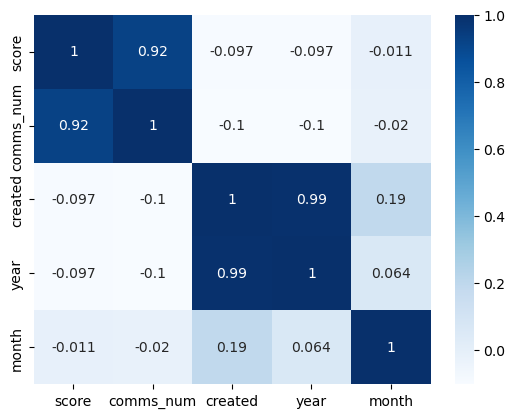

In [47]:
#plot the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()



d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


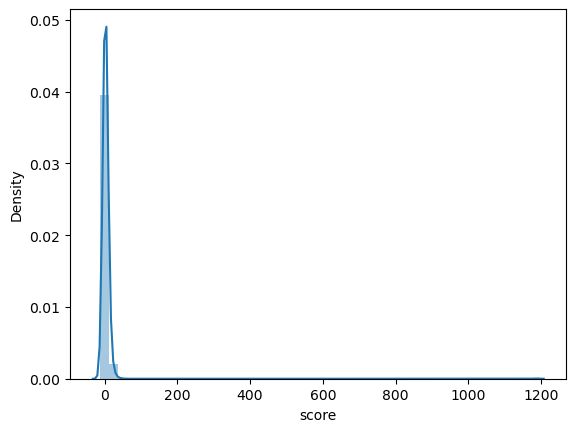

In [48]:
#plot the distribution of the score column
sns.distplot(df['score'])
plt.show()


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


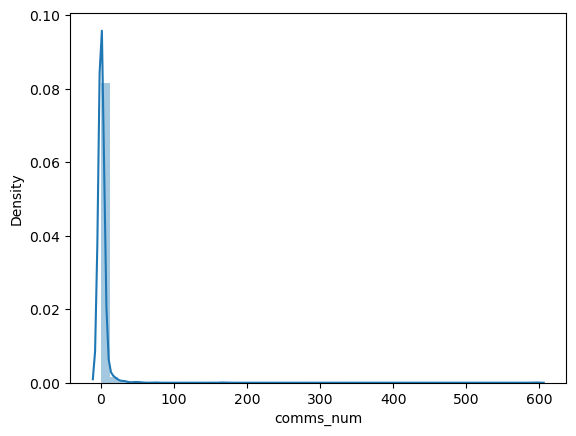

In [49]:
#plot the distribution of the comms_num column
sns.distplot(df['comms_num'])
plt.show()


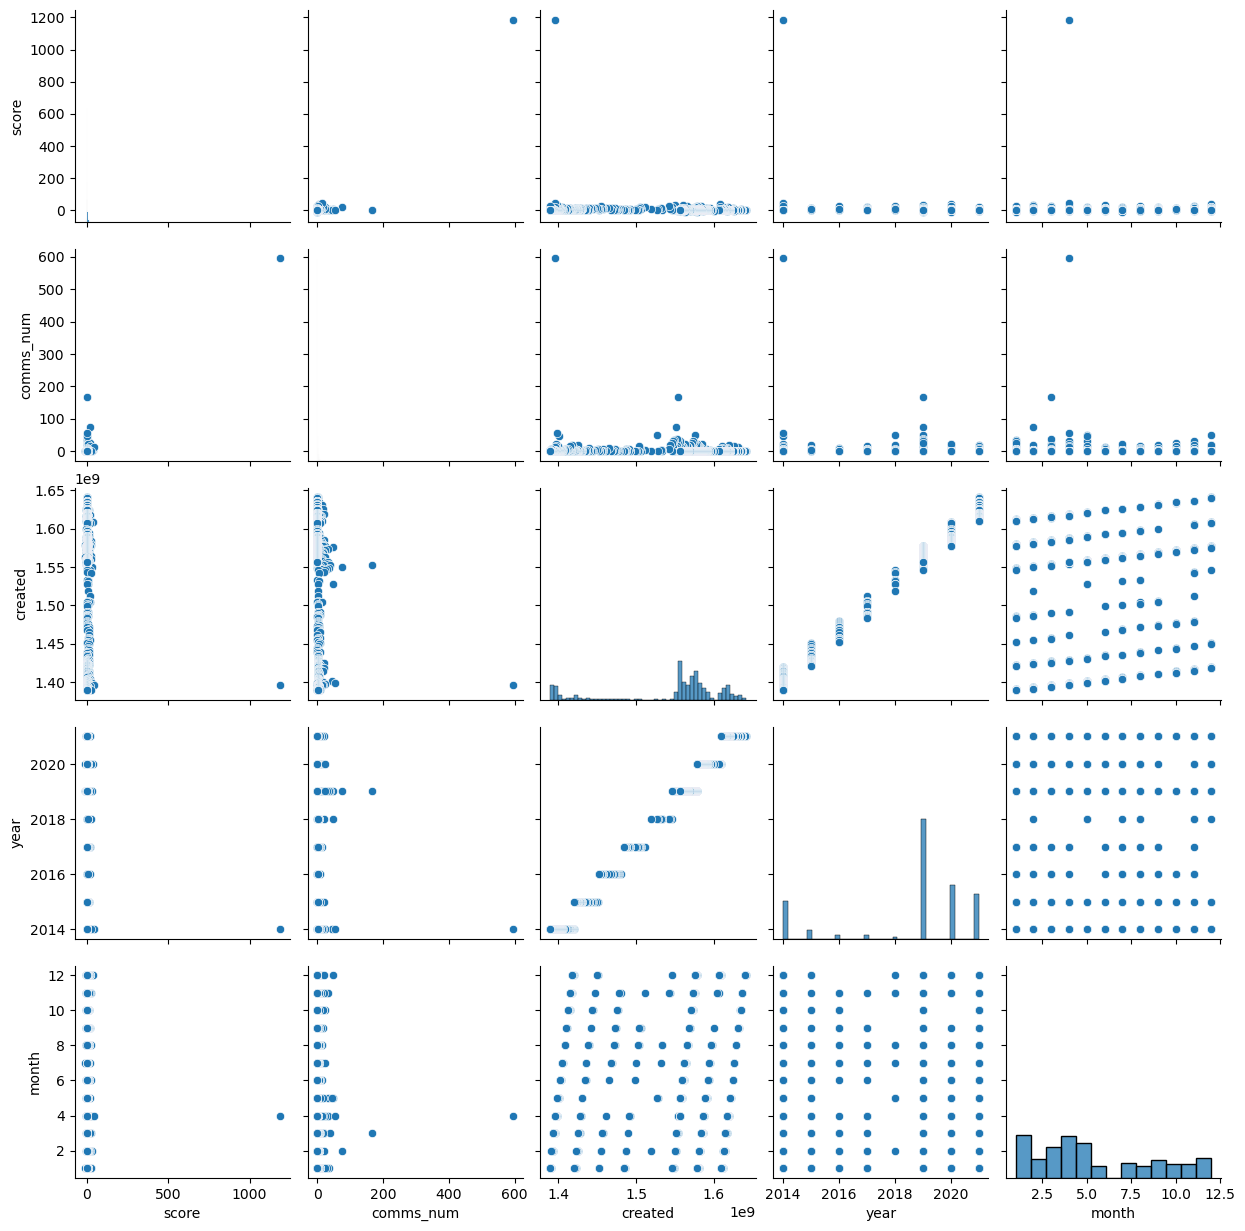

In [50]:
#pairplot
sns.pairplot(df)
plt.show()


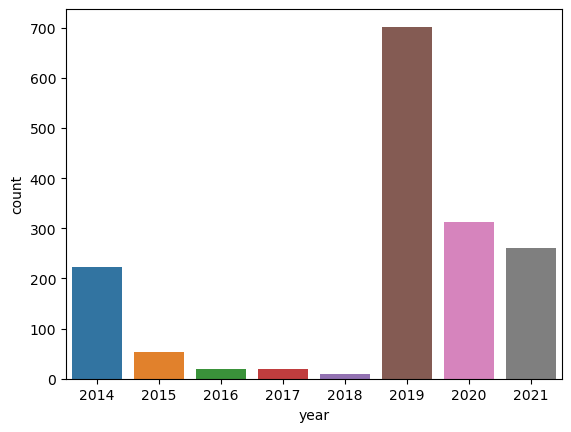

In [51]:
#plot the count of posts per year
sns.countplot(x='year', data=df)
plt.show()


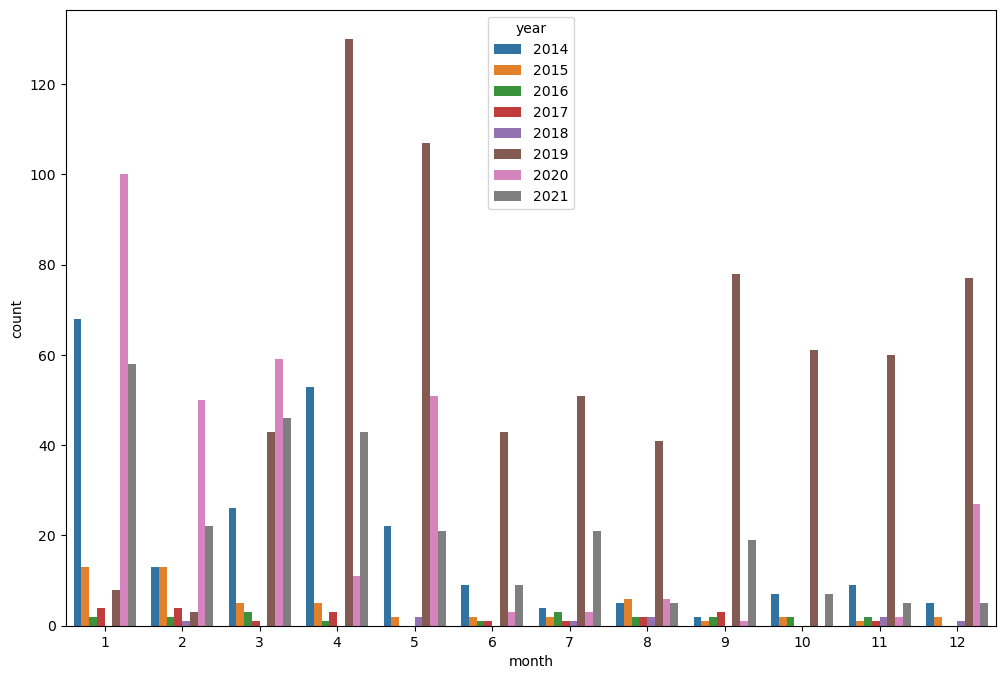

In [52]:
#plot the count of posts per month in each year
plt.figure(figsize=(12, 8))
sns.countplot(x='month', hue='year', data=df)
plt.show()


In [53]:
#make a copy of the dataframe
df_copy = df.copy()


In [54]:
#show columns of the copy
df_copy.columns


Index(['title', 'score', 'id', 'comms_num', 'created', 'body', 'timestamp',
       'year', 'month'],
      dtype='object')

In [55]:
#drop the columns that are not needed
df_copy.drop(['id', 'timestamp', "created", 'comms_num'], axis=1, inplace=True)

In [56]:
df_copy.head()

,title,score,body,year,month
0,Health Canada approves AstraZeneca COVID-19 va...,7,NaN,2021,2
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,NaN,2021,2
2,Coronavirus variants could fuel Canada's third...,6,NaN,2021,2
3,Canadian government to extend COVID-19 emergen...,1,NaN,2021,2
4,Canada: Pfizer is 'extremely committed' to mee...,6,NaN,2021,2


In [57]:
#lowercase the title and body columns
df_copy['title'] = df_copy['title'].str.lower()
df_copy['body'] = df_copy['body'].str.lower()


In [58]:
#show sample from title column
df_copy['title'].sample(20)


1015                                              comment
1237                                              comment
347     fwiw, i'm 90% sure vaccines killed my niece an...
1465                                              comment
213                 covid19 vaccination sentiments survey
608     you don't know what a vaccine is, you don't kn...
666                                               comment
1555                                              comment
1550                                              comment
80                                                comment
902                                               comment
801                                               comment
1128                                              comment
409     mercola is a hero, he dares to fight tptb, it'...
786                                               comment
1044                                              comment
195                 beyond the vaccine with celeste solum
64            

In [59]:
#show sample from body column
df_copy['body'].sample(20)


648                                               bad bot
323                                                   NaN
1457                                 this is simply false
294     vaccinate your kid guys. no more of this. .......
50      good job catching this error, but note that th...
1373    that's awful man. i tried showing her a story ...
914     but genetics is one of the only widely excepte...
108     yeah, a long time ago, vaccines weren’t as saf...
1587      i had a small stroke reading the first comments
1121    see claims like this annoy me, same with autis...
1093                                   that does seem odd
811                                never planned no to :d
97      i really can’t imagine you’d have any other po...
1253                            bruh that’s the joke idot
2                                                     NaN
925                                             poor kid.
405                                                   NaN
1449          

In [60]:
#remove stopwords from title and body columns
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop = stopwords.words('english')
df_copy['title'] = df_copy['title'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_copy['body'] = df_copy['body'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [61]:
#calculate polarity and subjectivity for title and body columns
#!pip install textblob
from textblob import TextBlob
df_copy['title_polarity'] = df_copy['title'].map(lambda text: TextBlob(text).sentiment.polarity)
df_copy['title_subjectivity'] = df_copy['title'].map(lambda text: TextBlob(text).sentiment.subjectivity)
df_copy['body_polarity'] = df_copy['body'].map(lambda text: TextBlob(text).sentiment.polarity)
df_copy['body_subjectivity'] = df_copy['body'].map(lambda text: TextBlob(text).sentiment.subjectivity)
df_copy.head()


,title,score,body,year,month,title_polarity,title_subjectivity,body_polarity,body_subjectivity
0,health canada approves astrazeneca covid-19 va...,7,nan,2021,2,0.000,0.0,0.0,0.0
1,covid-19 canada: 'vaccination passports' near ...,2,nan,2021,2,0.100,0.4,0.0,0.0
2,coronavirus variants could fuel canada's third...,6,nan,2021,2,0.000,0.0,0.0,0.0
3,canadian government extend covid-19 emergency ...,1,nan,2021,2,0.000,0.0,0.0,0.0
4,canada: pfizer 'extremely committed' meeting v...,6,nan,2021,2,-0.125,1.0,0.0,0.0


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


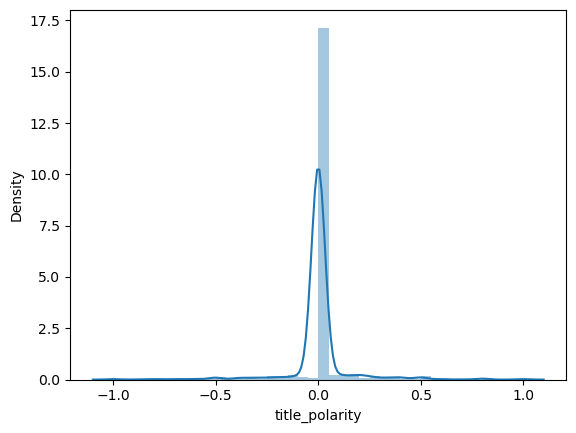

In [62]:
#plot the distribution of the title_polarity column
sns.distplot(df_copy['title_polarity'])
plt.show()


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


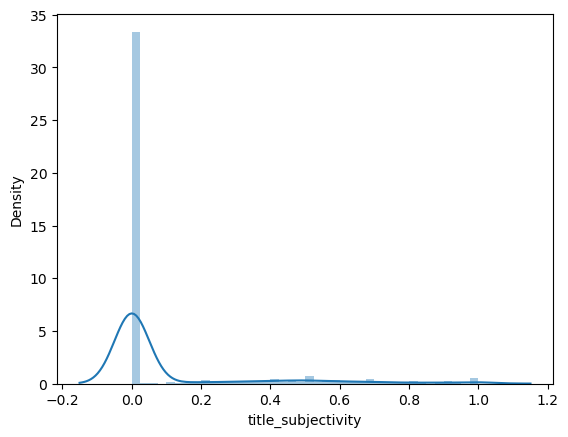

In [63]:
#plot the distribution of the title_subjectivity column
sns.distplot(df_copy['title_subjectivity'])
plt.show()


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


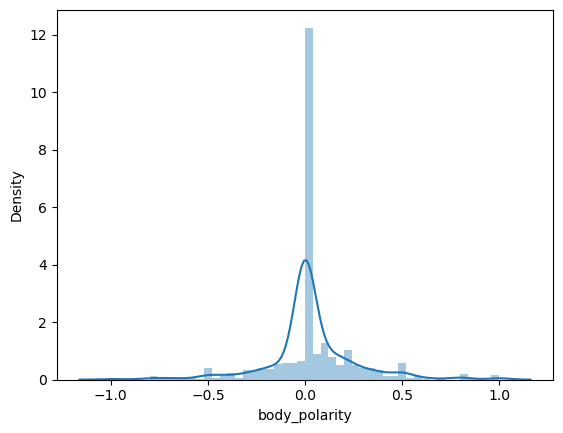

In [64]:
#plot the distribution of the body_polarity column
sns.distplot(df_copy['body_polarity'])
plt.show()


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


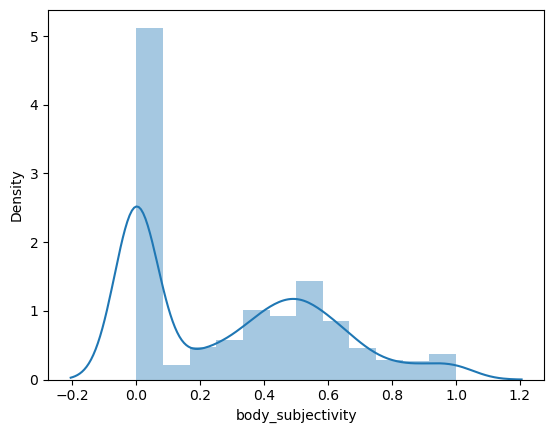

In [65]:
#plot the distribution of the body_subjectivity column
sns.distplot(df_copy['body_subjectivity'])
plt.show()


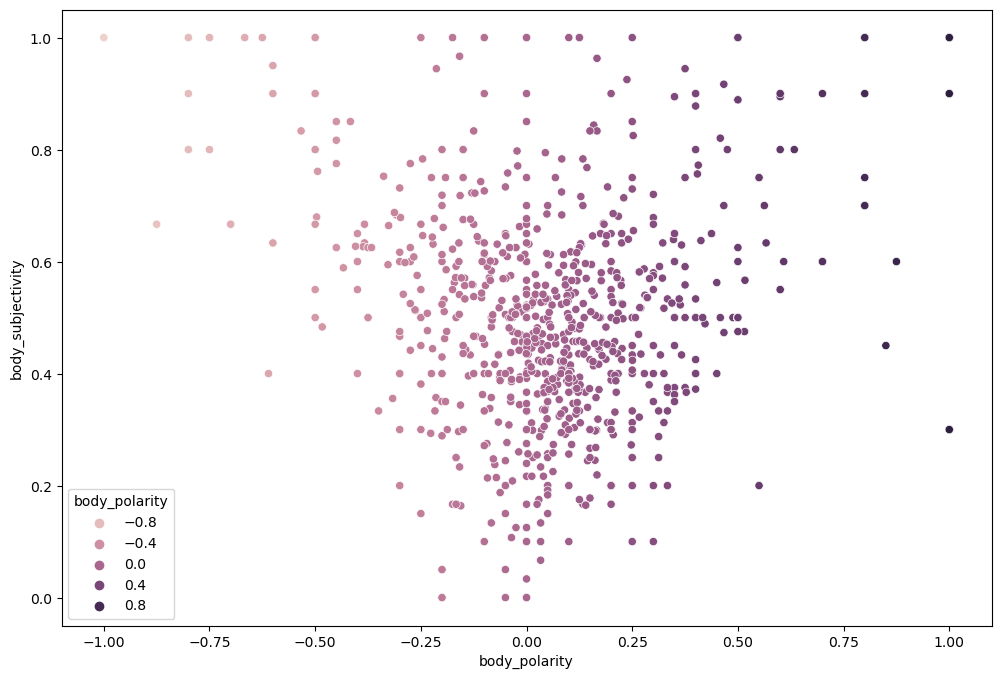

In [66]:
#plot the body_polarity vs body_subjectivity with different colors for positive, negative and neutral
plt.figure(figsize=(12, 8))
sns.scatterplot(x='body_polarity', y='body_subjectivity', hue='body_polarity', data=df_copy)
plt.show()




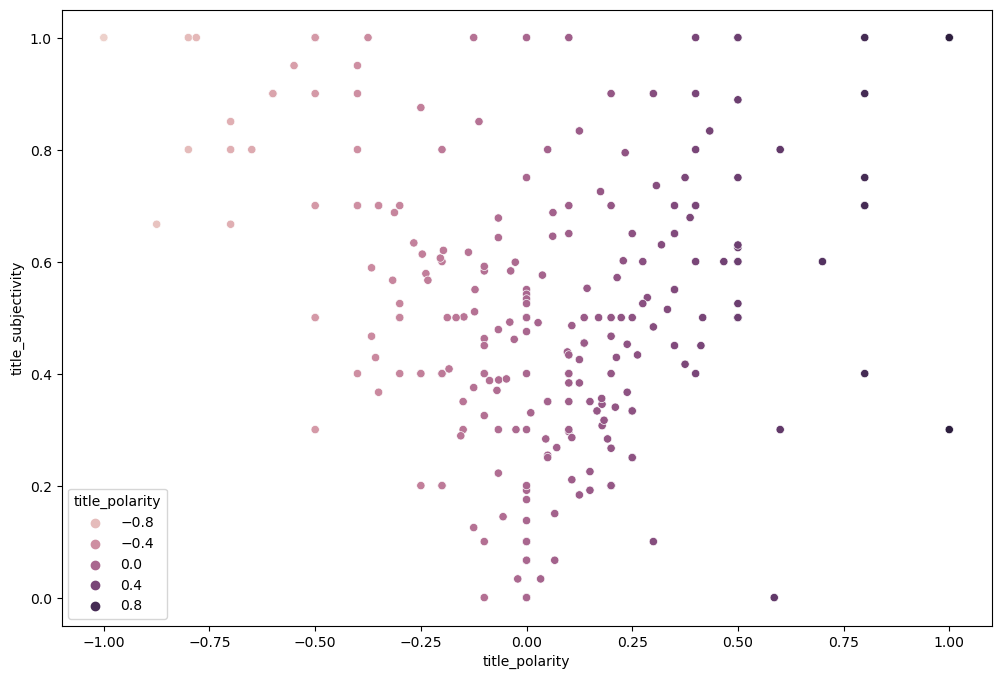

In [67]:
#plot the title_polarity vs title_subjectivity with different colors for positive, negative and neutral
plt.figure(figsize=(12, 8))
sns.scatterplot(x='title_polarity', y='title_subjectivity', hue='title_polarity', data=df_copy)
plt.show()
